In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

## <월급과 나이, 월급과 성별에 관한 분석>
###### 데이터 : 한국보건사회연구원의 한국복지패널 데이터 
######  우리나라 가구의 경제활동을 연구하여 복지 정책에 반영하기 위해 조사한 자료

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#데이터 불러오기
df=pd.read_csv("welfare.csv", encoding='cp949')
df.head()

,성별,출생연도,결혼,종교,월소득,직업코드,지역코드
0,2,1945,2,1,NaN,NaN,1
1,1,1948,2,2,NaN,NaN,1
2,1,1942,3,1,107.0,762.0,1
3,1,1962,1,1,192.0,855.0,1
4,2,1963,1,1,NaN,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      14418 non-null  int64  
 1   출생연도    14418 non-null  int64  
 2   결혼      14418 non-null  int64  
 3   종교      14418 non-null  int64  
 4   월소득     4534 non-null   float64
 5   직업코드    6878 non-null   float64
 6   지역코드    14418 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 788.6 KB


###  성별에 따른 월급 차이

In [6]:
# '성별'의 value_counts() 빈도 구하기  ( 1: 남,  2: 여 )
# 이상치 확인 (1, 2 외의 값 존재 확인)

df['성별'].value_counts()

2    7913
1    6505
Name: 성별, dtype: int64

In [7]:
# df[성별]== 1 이면 '남', 아니면 '여'로 변환
# np.where(  조건,   ,    ) 

df['성별']= np.where(df['성별']==1, '남', '여')
df.head()

,성별,출생연도,결혼,종교,월소득,직업코드,지역코드
0,여,1945,2,1,NaN,NaN,1
1,남,1948,2,2,NaN,NaN,1
2,남,1942,3,1,107.0,762.0,1
3,남,1962,1,1,192.0,855.0,1
4,여,1963,1,1,NaN,NaN,1


<AxesSubplot:xlabel='성별', ylabel='count'>

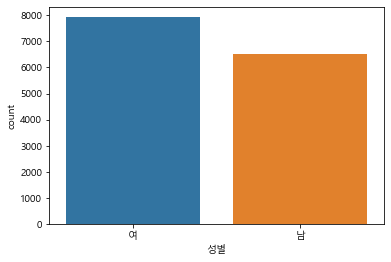

In [8]:
# sns.countplot(data=   , x='     )

sns.countplot(data= df, x='성별')

In [9]:
# 월소득 검토하기
# describe() 으로 통계 확인 & 이상치 확인

df['월소득'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: 월소득, dtype: float64

<AxesSubplot:xlabel='월소득', ylabel='Count'>

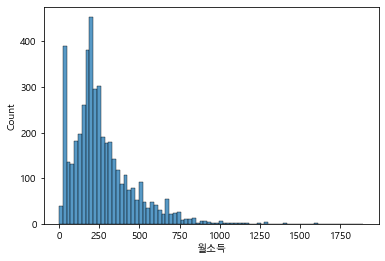

In [10]:
# 히스토그램 sns.histplot(data=    , x=      )

sns.histplot(data=df, x='월소득')

In [11]:
#결측치 확인 

df['월소득'].isna().sum()      

9884

In [12]:
df.shape

(14418, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      14418 non-null  object 
 1   출생연도    14418 non-null  int64  
 2   결혼      14418 non-null  int64  
 3   종교      14418 non-null  int64  
 4   월소득     4534 non-null   float64
 5   직업코드    6878 non-null   float64
 6   지역코드    14418 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 788.6+ KB


In [14]:
#결측치를 제거하기
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534 entries, 2 to 14416
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      4534 non-null   object 
 1   출생연도    4534 non-null   int64  
 2   결혼      4534 non-null   int64  
 3   종교      4534 non-null   int64  
 4   월소득     4534 non-null   float64
 5   직업코드    4534 non-null   float64
 6   지역코드    4534 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 283.4+ KB


In [15]:
# groupby()로 남 녀 그룹별 월소득 평균 구하기

df_gender = df.groupby('성별').mean()['월소득']
df_gender

성별
남    349.037571
여    186.293096
Name: 월소득, dtype: float64

C:\Users\box15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


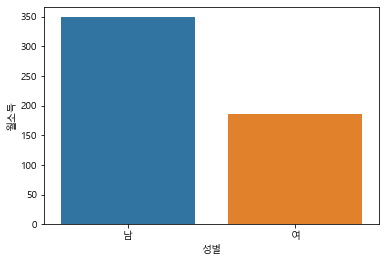

In [16]:
# 그래프로 비교하기
#sns.barplot(data=  , x=  , y=   )

x= df_gender.index
y= df_gender
sns.barplot(x,y)
plt.show()

## 나이와 월급의 관계

In [15]:
#출생연도 검토하기 & 이상치 확인
df['출생연도'].describe()

count    4534.000000
mean     1971.144685
std        15.290056
min      1928.000000
25%      1961.000000
50%      1972.000000
75%      1982.000000
max      2001.000000
Name: 출생연도, dtype: float64

<AxesSubplot:xlabel='출생연도', ylabel='Count'>

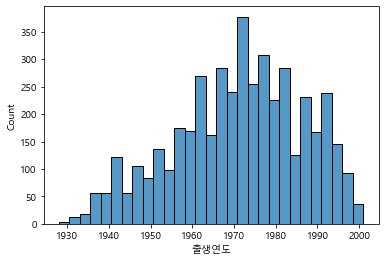

In [16]:
# sns.histplot(data=     , x=          )
sns.histplot(data=df, x='출생연도')

In [17]:
# '나이' 항목(컬럼) 만들기

df['나이'] = 2020-df['출생연도']
df.head()

,성별,출생연도,결혼,종교,월소득,직업코드,지역코드,나이
2,남,1942,3,1,107.0,762.0,1,78
3,남,1962,1,1,192.0,855.0,1,58
7,여,1934,1,1,27.0,941.0,1,86
8,여,1940,2,1,27.0,999.0,2,80
14,남,1978,1,2,338.0,312.0,1,42


In [18]:
# 나이 별로 월소득 평균 구하기(groupby) 

df_age= df.groupby('나이').mean()['월소득']
df_age

나이
19    162.000000
20    121.333333
21    136.400000
22    123.666667
23    179.676471
         ...    
88     27.000000
89     27.000000
90     27.000000
91     20.000000
92     27.000000
Name: 월소득, Length: 74, dtype: float64

In [19]:
# agg 를 사용하여 dataFrame 형식으로 저장한다.

df_age= df.groupby('나이').agg(income=('월소득','mean'))
df_age

,income
나이,
19,162.000000
20,121.333333
21,136.400000
22,123.666667
23,179.676471
...,...
88,27.000000
89,27.000000
90,27.000000


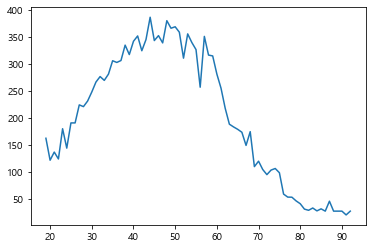

In [21]:
#연령별 평균 월소득 그래프로 그리기

x = df_age.index
y = df_age.income

plt.plot(x,y)
plt.show()

### 나이 및 성별과 월급의 관계

In [22]:
# '성별','나이' 에 따른 월소득 구하기

age_gender=df.groupby(['성별','나이']).agg(mean_income=('월소득','mean'))

age_gender

mean_income
성별 나이             
남  19        162.0
   20        155.0
   21        186.0
   22        121.5
   23        185.6
...            ...
여  88         27.0
   89         27.0
   90         27.0
   91         27.0
   92         27.0

[145 rows x 1 columns]

<AxesSubplot:xlabel='나이', ylabel='mean_income'>

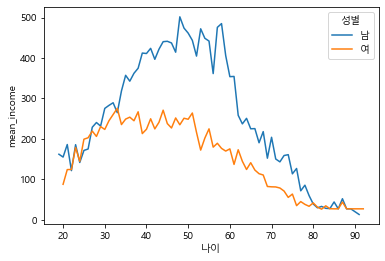

In [23]:
# 남,여 연령별 평균 월급 그래프로 확인하기
# sns.lineplot(data=   , x=      , y=     , hue=      )

sns.lineplot(data=age_gender, x='나이', y='mean_income', hue='성별' )

###  직업별 월급 비교

In [24]:
df.columns

Index(['성별', '출생연도', '결혼', '종교', '월소득', '직업코드', '지역코드', '나이'], dtype='object')

직업코드 불러오기

In [25]:
job_list=pd.read_csv('code_job.csv', encoding='cp949')
job_list.head()

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자


In [26]:
job_list.shape

(156, 2)

In [27]:
# merge를 사용하여 df와 job_list 병합
#pd.merge(  , , left_on= , right_on=  , how=   )

df= pd.merge(df, job_list, left_on='직업코드', right_on='code_job', how='inner')
df

,성별,출생연도,결혼,종교,월소득,직업코드,지역코드,나이,code_job,job
0,남,1942,3,1,107.0,762.0,1,78,762,전기공
1,남,1971,3,2,442.0,762.0,5,49,762,전기공
2,남,1982,5,2,305.0,762.0,3,38,762,전기공
3,남,1972,5,1,300.0,762.0,3,48,762,전기공
4,남,1961,1,1,330.0,762.0,2,59,762,전기공
...,...,...,...,...,...,...,...,...,...,...
4529,남,1968,1,1,688.0,882.0,4,52,882,재활용 처리 및 소각로 조작원
4530,남,2000,5,1,205.0,620.0,4,20,620,임업 관련 종사자
4531,남,1977,5,2,250.0,620.0,4,43,620,임업 관련 종사자
4532,남,1961,5,2,250.0,630.0,3,59,630,어업 관련 종사자


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534 entries, 0 to 4533
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   성별        4534 non-null   object 
 1   출생연도      4534 non-null   int64  
 2   결혼        4534 non-null   int64  
 3   종교        4534 non-null   int64  
 4   월소득       4534 non-null   float64
 5   직업코드      4534 non-null   float64
 6   지역코드      4534 non-null   int64  
 7   나이        4534 non-null   int64  
 8   code_job  4534 non-null   int64  
 9   job       4534 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 389.6+ KB


직업별 월급 평균 표 만들기

In [29]:
job_income = df.groupby('job').agg(mean_income=('월소득','mean'))
job_income

,mean_income
job,
가사 및 육아 도우미,92.455882
간호사,265.219178
감정?기술영업및중개관련종사자,391.000000
건물 관리원 및 검표원,168.375000
건설 및 광업 단순 종사자,261.975000
...,...
화학?고무 및 플라스틱 제품 생산기 조작원,452.714286
화학공학 기술자 및 시험원,489.500000
환경?청소 및 경비 관련 관리자,201.000000


그래프 만들기

In [30]:
# 'mean_income'을 기준으로 내림차순 정렬
# sort_values( 기준항목 , ascending=  )

job_income= job_income.sort_values('mean_income', ascending=False)
job_income

,mean_income
job,
의료 진료 전문가,781.000000
법률 전문가,776.333333
행정 및 경영 지원 관리자,771.833333
보험 및 금융 관리자,734.750000
재활용 처리 및 소각로 조작원,688.000000
...,...
돌봄 및 보건 서비스 종사자,117.162338
가사 및 육아 도우미,92.455882
청소원 및 환경미화원,88.461756


<AxesSubplot:xlabel='mean_income', ylabel='job'>

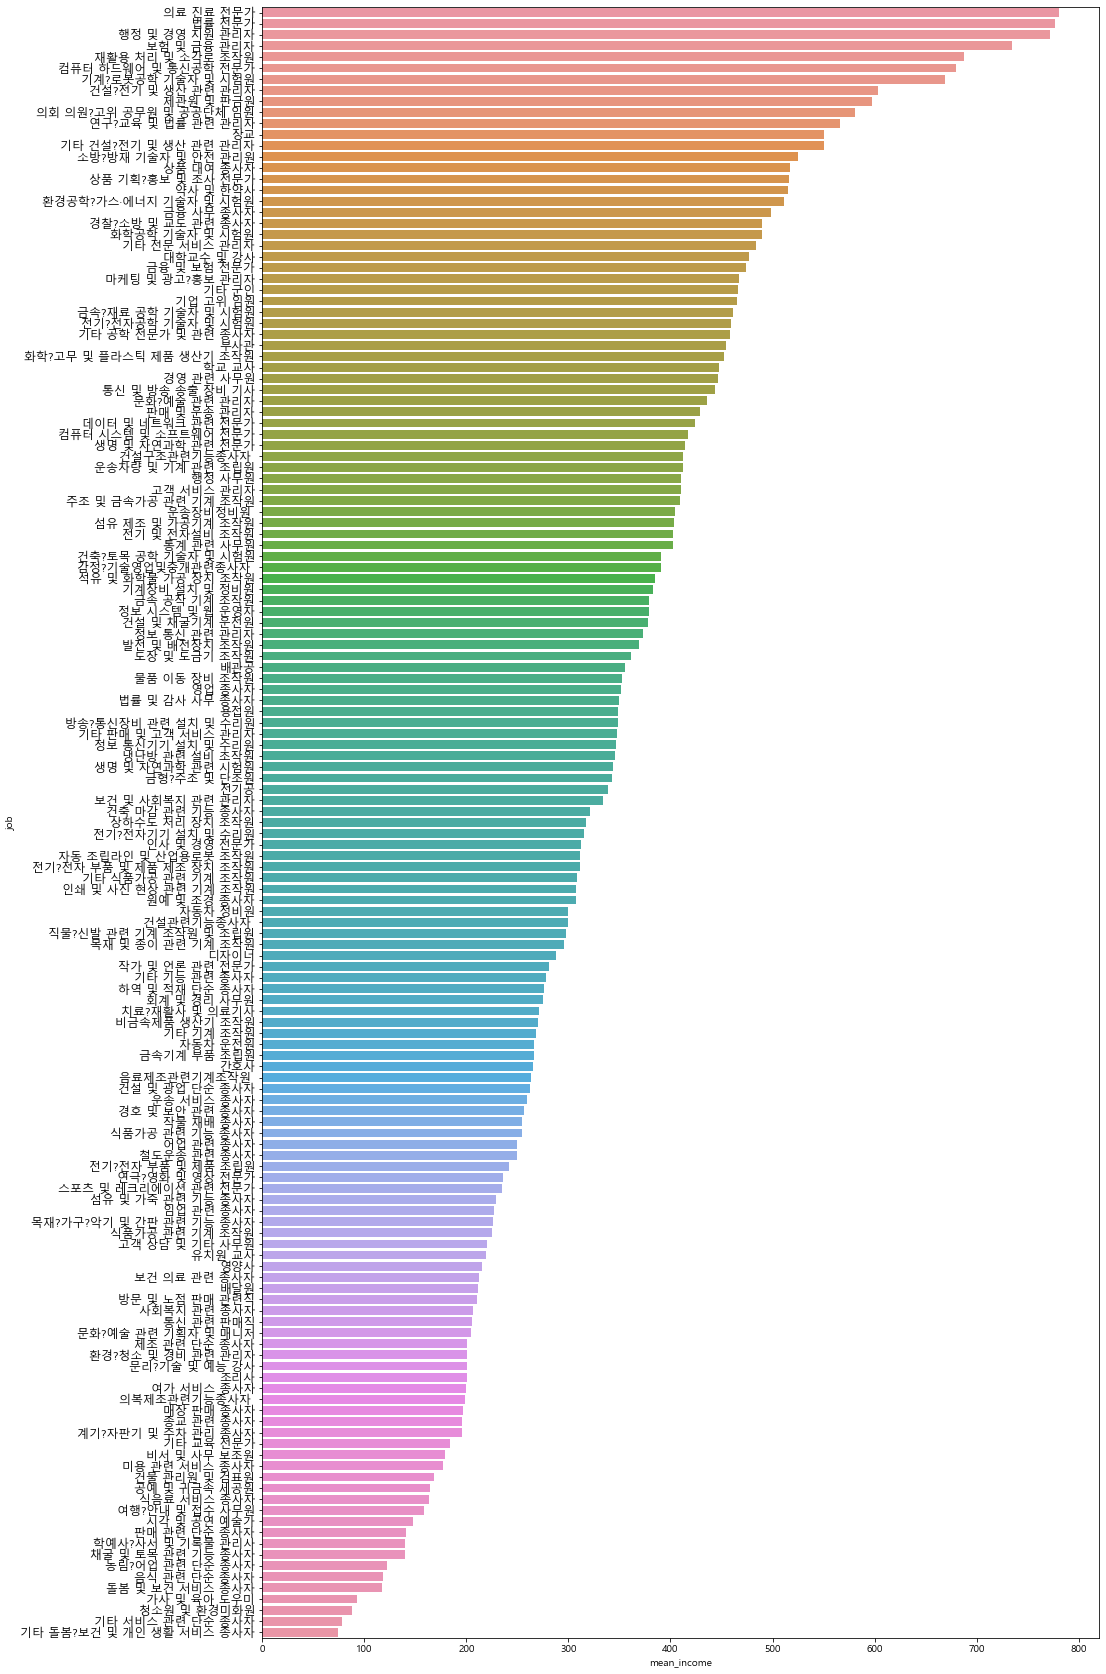

In [31]:
plt.figure(figsize=(15,30))
plt.yticks(fontsize=12)

sns.barplot(data= job_income, y=job_income.index, x='mean_income')

월급이 많은 직업 top10

In [32]:
top10 = job_income.head(10)
top10

,mean_income
job,
의료 진료 전문가,781.000000
법률 전문가,776.333333
행정 및 경영 지원 관리자,771.833333
보험 및 금융 관리자,734.750000
재활용 처리 및 소각로 조작원,688.000000
컴퓨터 하드웨어 및 통신공학 전문가,679.444444
기계?로봇공학 기술자 및 시험원,669.166667
건설?전기 및 생산 관련 관리자,603.083333
제관원 및 판금원,597.000000


<AxesSubplot:xlabel='mean_income', ylabel='job'>

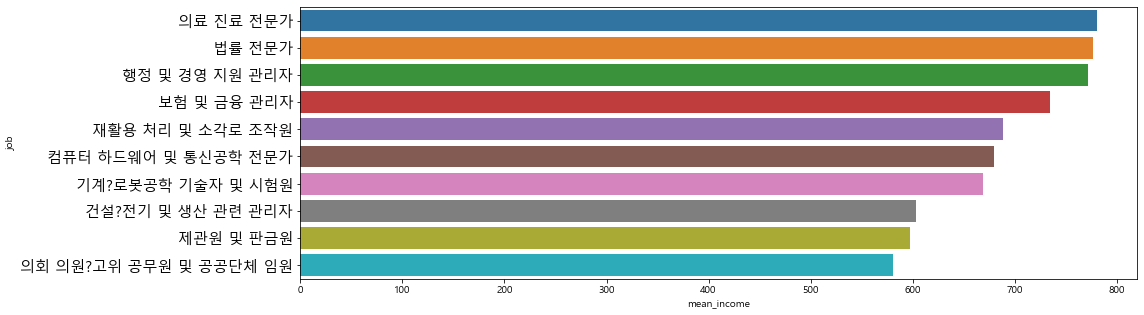

In [33]:
plt.figure(figsize=(15,5))
plt.yticks(fontsize=15)

sns.barplot(data= top10, y=top10.index, x='mean_income')

월급이 적은 직업 bottom10

In [34]:
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,mean_income
job,
기타 돌봄?보건 및 개인 생활 서비스 종사자,73.964286
기타 서비스 관련 단순 종사자,77.789474
청소원 및 환경미화원,88.461756
가사 및 육아 도우미,92.455882
돌봄 및 보건 서비스 종사자,117.162338
음식 관련 단순 종사자,118.187500
농림?어업 관련 단순 종사자,122.625000
채굴 및 토목 관련 기능 종사자,140.000000
학예사?사서 및 기록물 관리사,140.000000


<AxesSubplot:xlabel='mean_income', ylabel='job'>

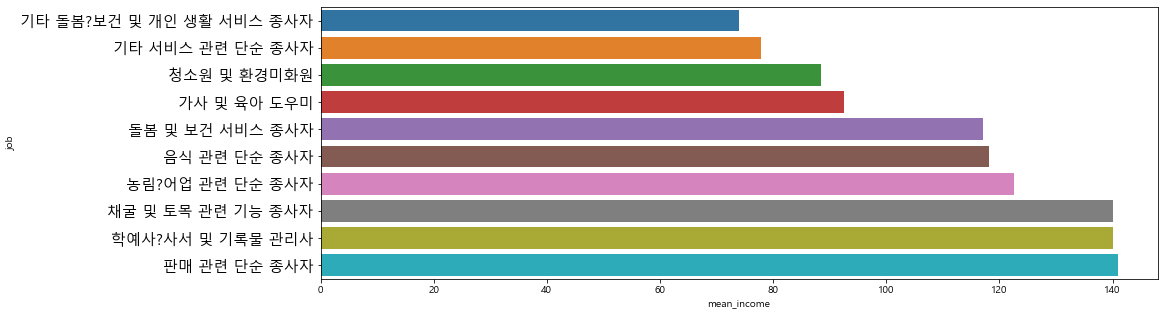

In [35]:
plt.figure(figsize=(15,5))
plt.yticks(fontsize=15)

sns.barplot(data= bottom10, y=bottom10.index, x='mean_income')